In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
'''
age: continuous. 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
education-num: continuous. 
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
sex: Female, Male. 
capital-gain: continuous. 
capital-loss: continuous. 
hours-per-week: continuous. 
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
'''
['age', 'fnlwgt', 'educational-num', 'cg', 'cl', 'hw']

['age', 'fnlwgt', 'educational-num', 'cg', 'cl', 'hw']

In [3]:


df = pd.read_csv('adult.data',index_col=False,
                names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                       'mari', 'occupation', 'relationship', 'race', 'sex', 'cg', 'cl', 'hw', 'na', '5k'])

# df.count()
# df.isnull().any() #null값이 있는지 확인, null이 있으면 없애주거나 추가해줘야함


In [4]:
# sns.countplot('5k', hue='sex', data=df)
# sns.heatmap(df.corr(), annot=True, cmap='summer_r', linewidths=0.2)
# plt.figure(figsize=(9, 9))
# sns.violinplot('race', 'age', hue='5k', data=df, split=True)

Y = df['5k'].values.tolist()
Y = [1 if i == ' <=50K' else 0 for i in Y]
Y = to_categorical(Y)
print(Y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [5]:
X = df.drop(['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw', '5k'], axis=1) #드롭시키고나서
X = pd.get_dummies(X, drop_first=True) # 각각의 스트링데이터들을 원핫인코딩 시켰음
X = pd.concat([X, df[['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw']]], axis=1) #피쳐들을 다시 합침

scaler = MinMaxScaler() #숫자들에 대한 컬럼들을 스케일러 api를 통해서 0~1사이의 값으로 매칭시킴

X[['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw']] = scaler.fit_transform(X[['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw']])

X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,na_ Trinadad&Tobago,na_ United-States,na_ Vietnam,na_ Yugoslavia,age,fnlwgt,education-num,cg,cl,hw
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [6]:
X_train = X[:-1000]
X_test =X[-1000:]

Y_train = Y[:-1000]
Y_test = Y[-1000:]

X_train.shape #31561개의 데이터가 있고 각각의 데이터는 100개의 피쳐를 가지고 있다.


(31561, 100)

In [7]:
#모델 구성
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(100,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()


#adam이나 rmspropr 이라는 옵티마이저를 쓸 수도 있음
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# validation_split은 인풋데이터를 줬을 때 이 중 0.2퍼센트는 
# 자기가 백프로퍼게이션을 중 랜덤하게 나머지를 가지고 트레이닝 도중 테스트를 하여 accuracy를 계산
hist = model.fit(X_train, Y_train, epochs=5, validation_split=0.2) 


W0820 00:43:03.411910  4292 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 00:43:03.425028  4292 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 00:43:03.427031  4292 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 00:43:03.459059  4292 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 00:43:03.474073  4292 deprecation_wrapper.py:119] From C:\Users\brb11\Anac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              103424    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 694,146
Trainable params: 694,146
Non-trainable params: 0
_________________________________________________________________


W0820 00:43:03.536137  4292 deprecation.py:323] From C:\Users\brb11\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0820 00:43:03.570677  4292 deprecation_wrapper.py:119] From C:\Users\brb11\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25248 samples, validate on 6313 samples
Epoch 1/5
25248/25248 [==============================] - 4s 144us/step - loss: 0.4348 - acc: 0.7967 - val_loss: 0.3791 - val_acc: 0.8283
Epoch 2/5
25248/25248 [==============================] - 3s 137us/step - loss: 0.3649 - acc: 0.8314 - val_loss: 0.3636 - val_acc: 0.8302
Epoch 3/5
25248/25248 [==============================] - 3s 137us/step - loss: 0.3531 - acc: 0.8347 - val_loss: 0.3512 - val_acc: 0.8351
Epoch 4/5
25248/25248 [==============================] - 4s 139us/step - loss: 0.3458 - acc: 0.8382 - val_loss: 0.3431 - val_acc: 0.8411
Epoch 5/5
25248/25248 [==============================] - 4s 139us/step - loss: 0.3410 - acc: 0.8421 - val_loss: 0.3392 - val_acc: 0.8429


{'val_loss': [0.3791142080422345, 0.3636340662688324, 0.3511697441438629, 0.3431153306771473, 0.3391761985753052], 'val_acc': [0.8282908284775564, 0.8301916680055773, 0.8351021701440218, 0.8411214953459859, 0.8428639315886598], 'loss': [0.4347530649113262, 0.36488818338539813, 0.35311614335791996, 0.34583449511020353, 0.3409641812282823], 'acc': [0.7967363751584284, 0.8313529784537389, 0.8346799746514575, 0.8382446134347274, 0.8421261089987325]}


Text(0.5, 1.0, 'loss')

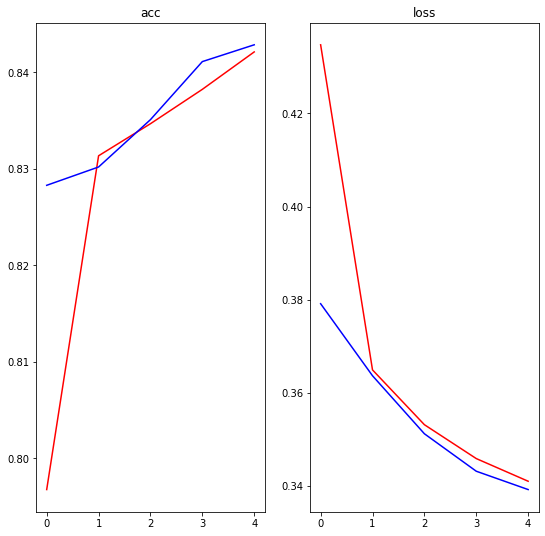

In [8]:
print(hist.history)

plt.figure(figsize=(9,9))
plt.subplot(1, 2, 1)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('acc')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')


In [9]:
score = model.evaluate(X_test, Y_test)
pred = model.predict(X_test)
print(score)

print(pred[:10])
print(Y[:10])

1000/1000 [==============================] - 0s 18us/step
[0.35534881019592285, 0.815]
[[0.8392324  0.1607676 ]
 [0.05834896 0.94165105]
 [0.49962294 0.5003771 ]
 [0.05891647 0.94108355]
 [0.855304   0.14469598]
 [0.02796294 0.9720371 ]
 [0.02298889 0.97701114]
 [0.01096183 0.9890381 ]
 [0.35842267 0.6415773 ]
 [0.02014569 0.9798543 ]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
